Лабораторная работа 7. Цифровая обработка изображений.

In [43]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [61]:
import sys
sys.path.append('../')
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Изменим стандартный размер графиков matplotlib
WIDTH_SIZE = 15
HEIGHT_SIZE = 10
plt.rcParams["figure.figsize"] = [WIDTH_SIZE, HEIGHT_SIZE]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


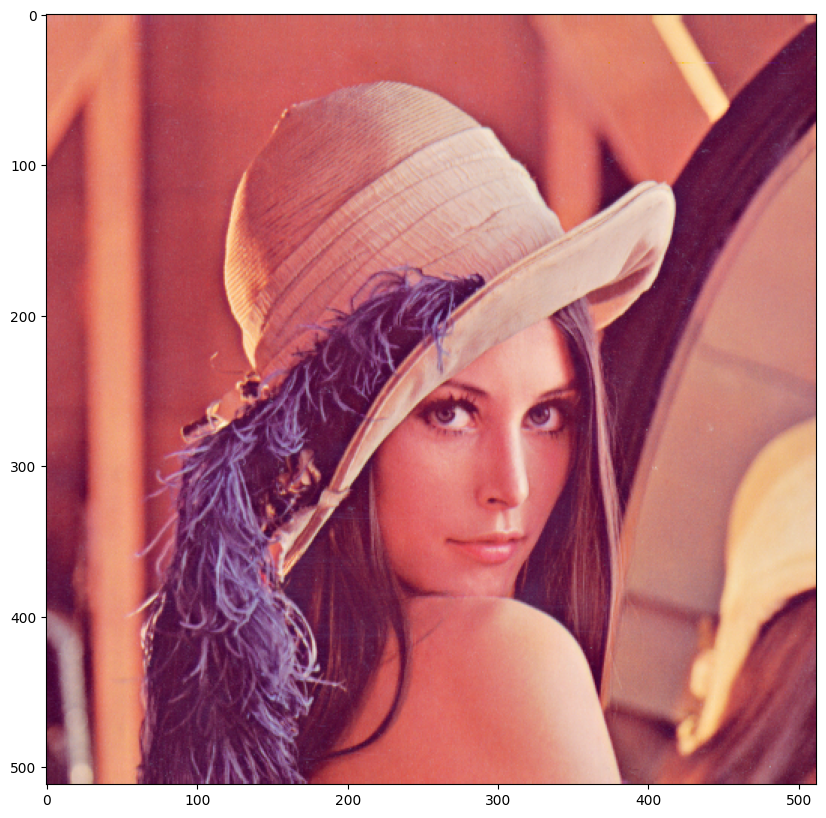

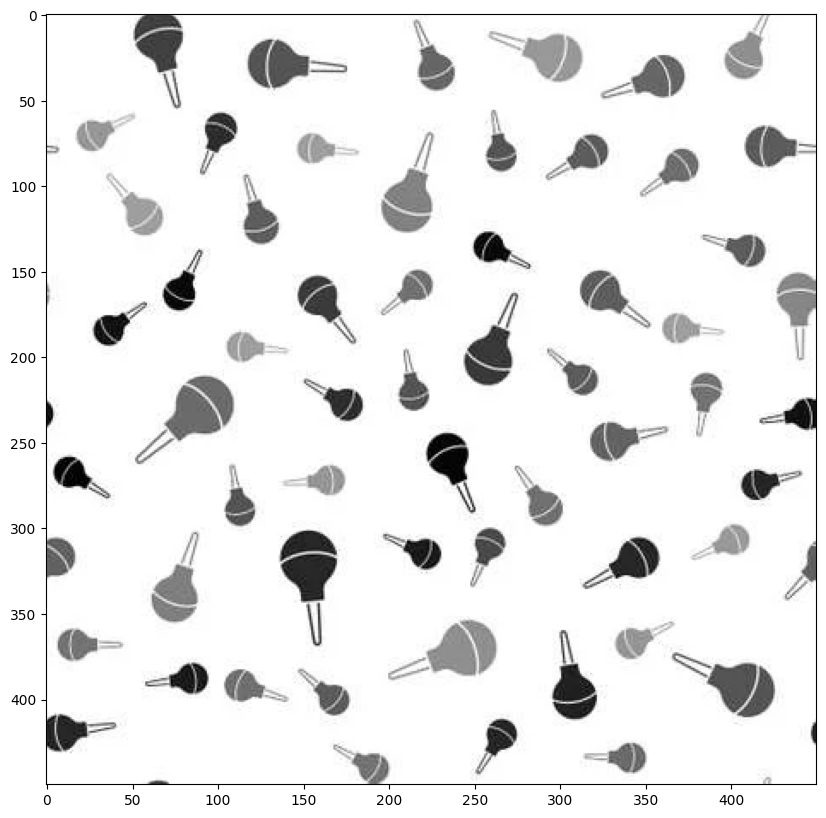

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import cv2 as cv
from google.colab import drive
drive.mount('/content/drive')



image1 = cv.imread('/content/drive/MyDrive/obrabotka image/images/lenna.png')
plt.figure()
rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
gray_img = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))

templat = cv.imread('/content/drive/MyDrive/obrabotka image/images/pear.png')
plt.figure()
gray_templ = cv.cvtColor(templat, cv.COLOR_BGR2GRAY)
rgb_templat = cv.cvtColor(templat, cv.COLOR_BGR2RGB)
plt.imshow(cv.cvtColor(templat, cv.COLOR_BGR2RGB))



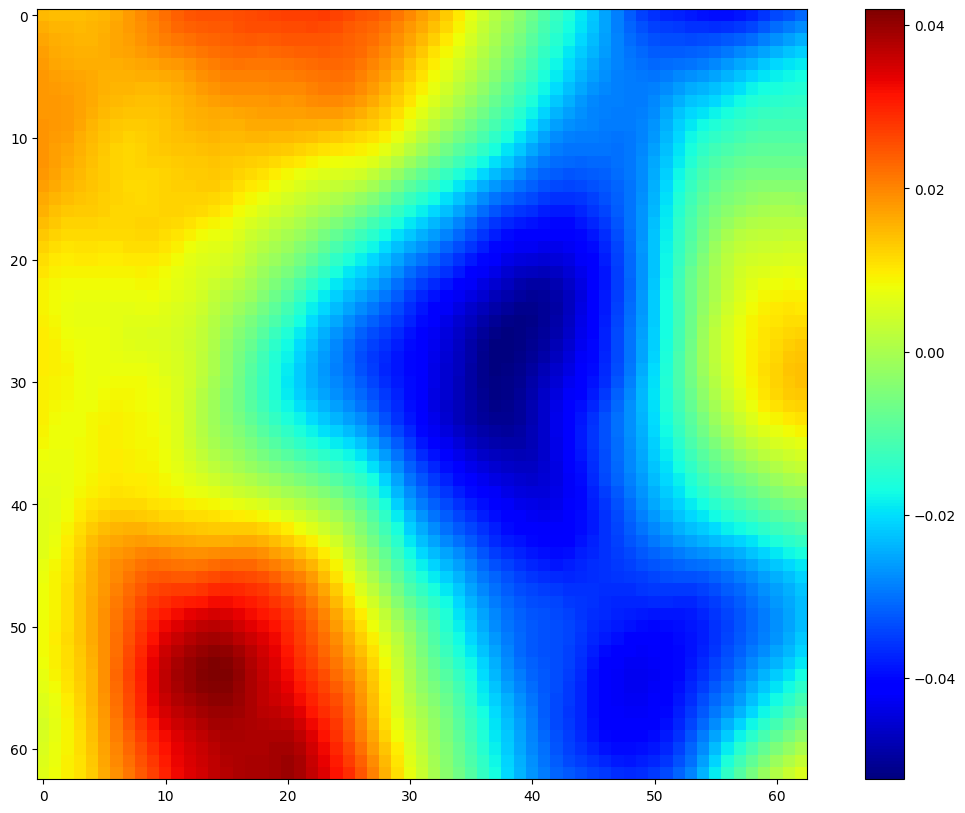

In [79]:
# Считаем размеры шаблона
w, h = templat.shape[:-1]

# Вызываем функцию cv2.matchTemplate для вычисления метрики схожести
# в качестве параметров передаем изображение, шаблон и тип вычисляемой метрики
res = cv2.matchTemplate(gray_img,gray_templ,cv2.TM_CCOEFF_NORMED)

# Возможные варианты метрик:
#    cv2.TM_SQDIFF — сумма квадратов разниц значений пикселей
#    cv2.TM_SQDIFF_NORMED — сумма квадрат разниц цветов, отнормированная в диапазон 0..1.
#    cv2.TM_CCORR — сумма поэлементных произведений шаблона и сегмента картинки
#    cv2.TM_CCORR_NORMED — сумма поэлементных произведений, отнормированное в диапазон -1..1.
#    cv2.TM_CCOEFF — кросс-коррелация изображений без среднего
#    cv2.TM_CCOEFF_NORMED — кросс-корреляция между изображениями без среднего, отнормированная в -1..1 (корреляция Пирсона)
plt.figure()
plt.imshow(res, cmap='jet')
plt.colorbar()

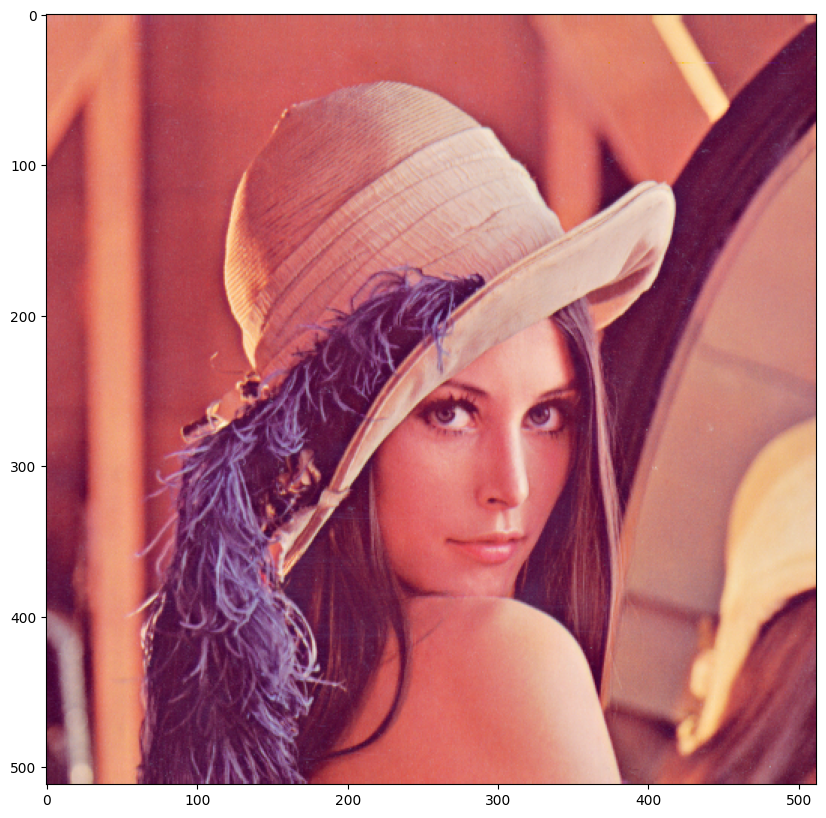

In [80]:
threshold = 0.8
loc = np.where(res >= threshold)
# Вокруг выделенных максимумов обводим прямоугольники с размерами шаблона
plot_img = image1.copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(plot_img, pt,(pt[0] + w, pt[1] + h),(0,255,255), 8)

# Отображаем результат на графике
plt.figure()
plt.imshow(cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB))


(Text(0.5, 1.0, 'Sobel'), ([], []), ([], []))

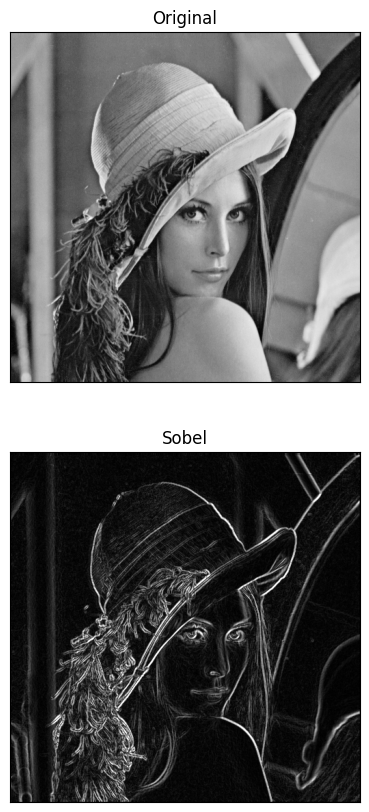

In [81]:
# Границы вычисляем на изображении в оттенках серого
imgG = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Для выделения границ используем фильтр Собеля в двух направлениях
x = cv2.Sobel(imgG,cv2.CV_16S,1,0)
y = cv2.Sobel(imgG,cv2.CV_16S,0,1)

# берем модуль от результата применения фильтра Собеля
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

# объединяем "вертикальные" и "горизонтальные" границы в одно изображение
dstI = cv2.addWeighted(absX,0.5,absY,0.5,0)
plt.figure()
plt.subplot(2,1,1),plt.imshow(imgG,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(dstI,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel'), ([], []), ([], []))

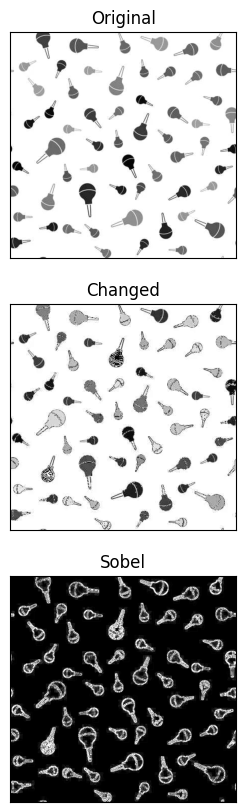

In [84]:
tmpG = 2*cv2.cvtColor(templat, cv2.COLOR_BGR2GRAY)
x = cv2.Sobel(tmpG,cv2.CV_16S,1,0)
y = cv2.Sobel(tmpG,cv2.CV_16S,0,1)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
dstT = cv2.addWeighted(absX,0.5,absY,0.5,0)

plt.subplot(3,1,1),plt.imshow(cv2.cvtColor(templat, cv2.COLOR_BGR2GRAY),cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2),plt.imshow(tmpG,cmap = 'gray')
plt.title('Changed'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3),plt.imshow(dstT,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

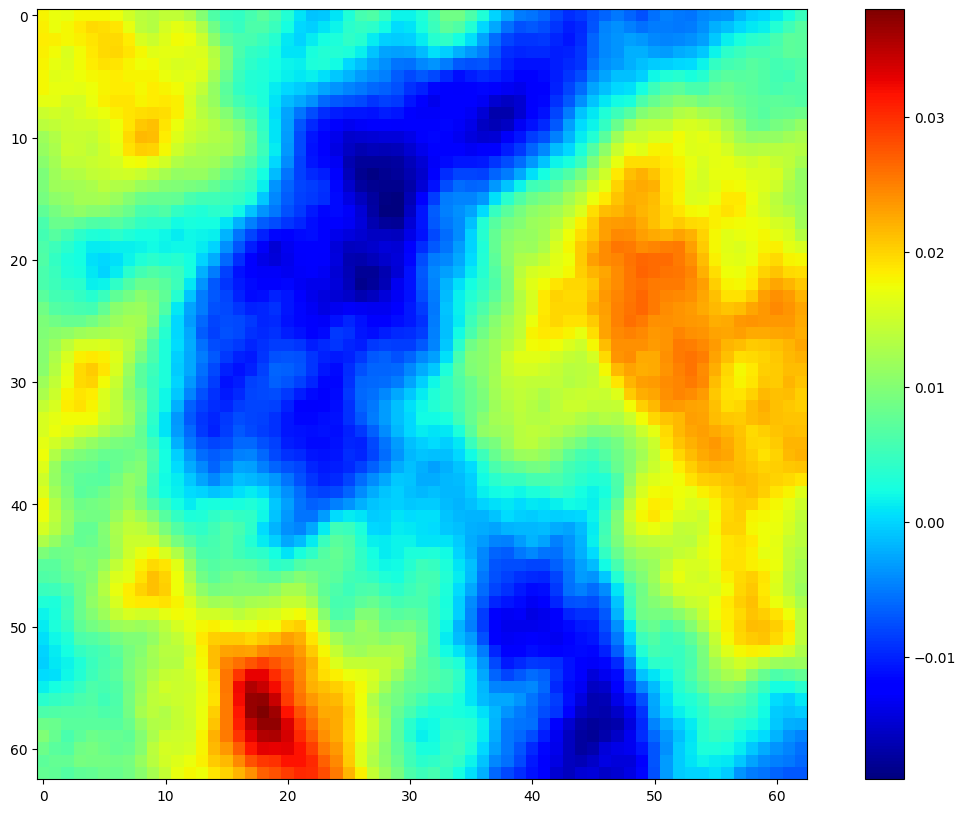

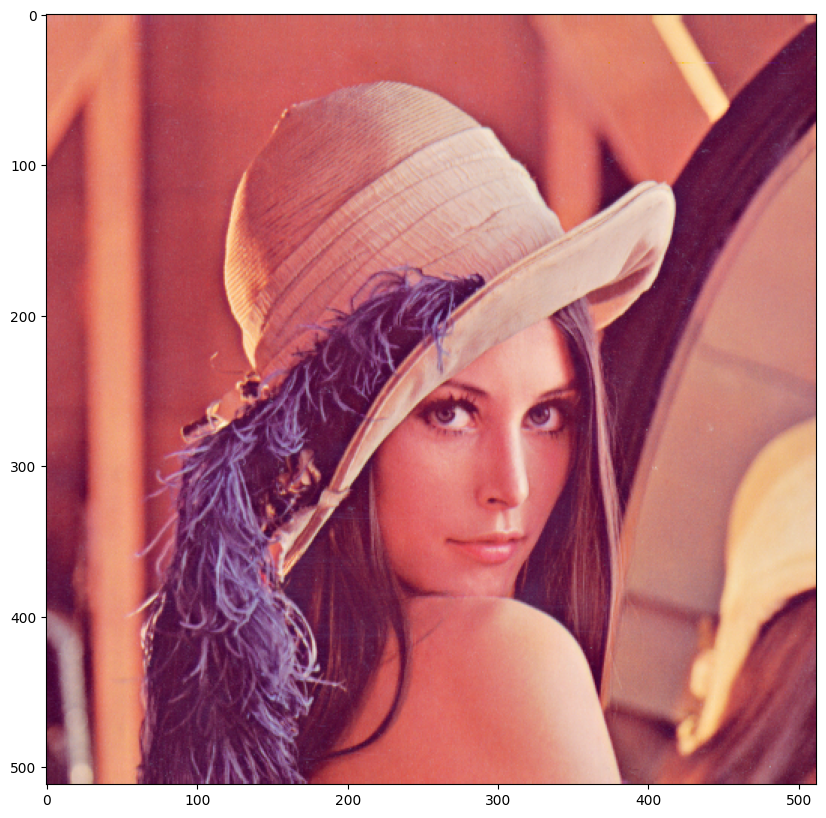

In [86]:
# Считаем размеры шаблона
w, h = tmpG.shape

# Вычисляем метрику схожести
res = cv2.matchTemplate(dstI,dstT,cv2.TM_CCOEFF_NORMED)
plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.imshow(res, cmap='jet')
plt.colorbar()

#  Отбираем максимумы и строим результат на графике
threshold = 0.7
loc = np.where(res >= threshold)
plot_img = image1.copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(plot_img, pt,(pt[0] + w, pt[1] + h),(0,255,255), 8)

plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.imshow(cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB))

(20.486684799194336, 74.56652069091797)
13.207636833190918
357.3807373046875
0.031852591782808304
13.207636833190918


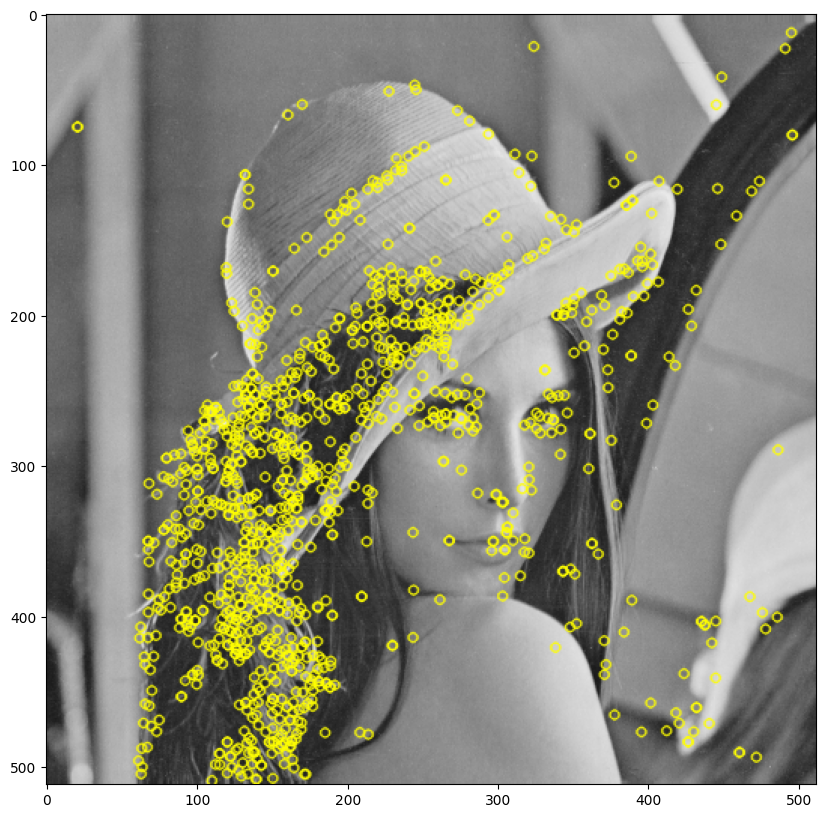

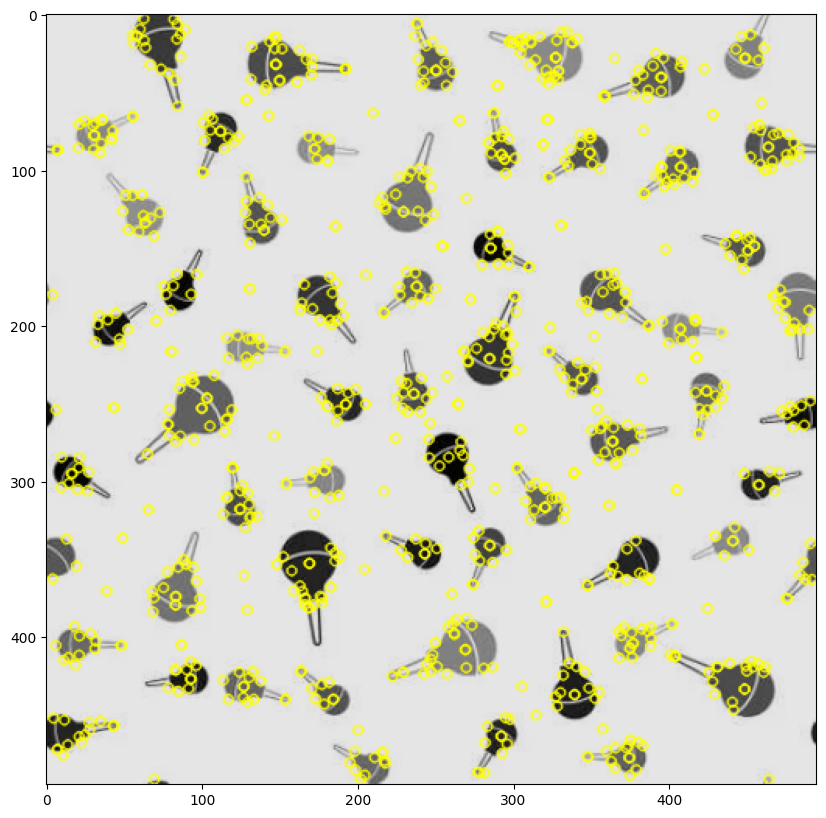

In [88]:
# Преобразуем и вносим небольшие изменения в шаблон

    # Преобразуем в оттенки серого
scale = 1.1 # масштаб изменения размеров
scBr = 0.9 # коэффициент изменения яркости

template_scale = cv2.resize(np.uint8(0.9*cv2.cvtColor(templat, cv2.COLOR_BGR2GRAY)),
           (int(templat.shape[1]*scale), int(templat.shape[0]*scale)), interpolation = cv2.INTER_AREA)

# Создаем детектор особых точек
sift = cv2.SIFT_create()
# sift = cv2.xfeatures2d.SIFT_create() # В зависимости от версии opencv может работать эта команда

# Запускаем детектор на изображении и на шаблоне
# Метод возвращает список особых точек и их дескрипторов
k_1, des_1 = sift.detectAndCompute(gray_img, None)
k_2, des_2 = sift.detectAndCompute(template_scale, None)

# Каждая особая точка имеет несколько параметров, таких как координаты,
# размер, угол ориентации, мощность отклика и размер области особой точки.
print(k_1[1].pt)
print(k_1[1].size)
print(k_1[1].angle)
print(k_1[1].response)
print(k_1[1].size)

# Отрисуем найденные точки на картинке
image_key_point = cv2.drawKeypoints(gray_img, k_1, des_1, (0, 255, 255))
plt.figure()
plt.imshow(cv2.cvtColor(image_key_point, cv2.COLOR_BGR2RGB))

# Отрисуем найденные точки на шаблоне
template_key_point = cv2.drawKeypoints(template_scale, k_2, des_2, (0, 255, 255))
plt.figure()
plt.imshow(cv2.cvtColor(template_key_point, cv2.COLOR_BGR2RGB))

In [89]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

In [90]:
matches = bf.match(des_1, des_2)

print(matches[1].queryIdx)
print(matches[1].trainIdx)
print(matches[1].distance)

28
488
1208.0


5.581547260284424


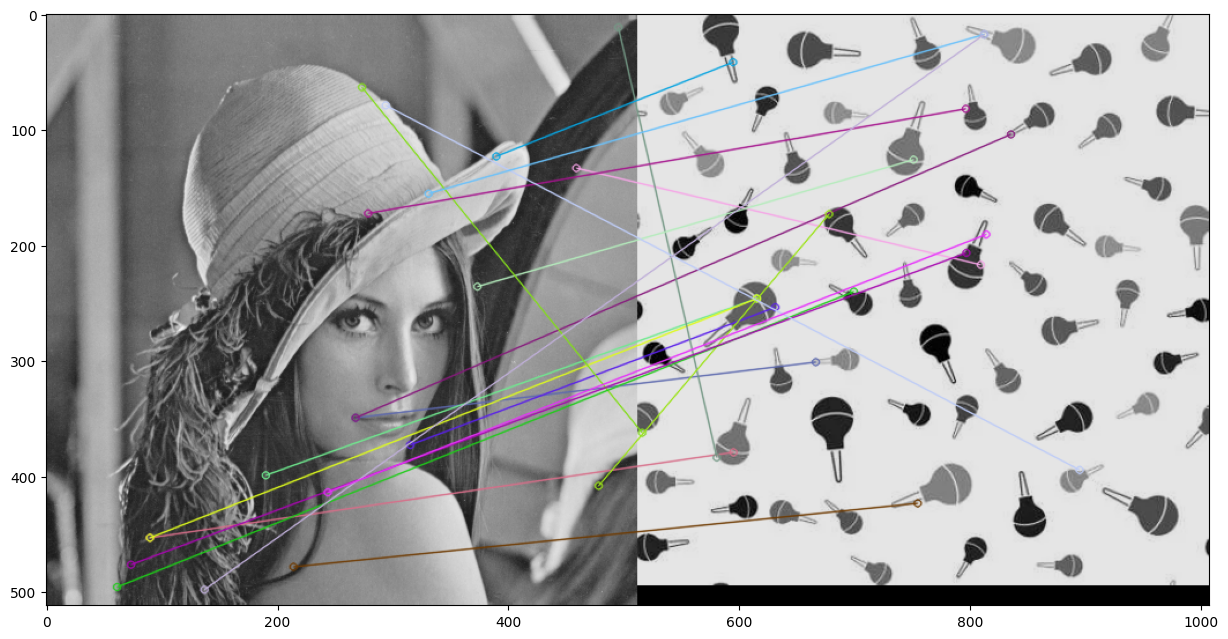

In [91]:
print(k_1[matches[1].queryIdx].size)
matches = sorted(matches, key=lambda x: x.distance)
image_with_matches = cv2.drawMatches(gray_img, k_1, template_scale, k_2, matches[:20], template_scale, flags=2)
plt.figure()
plt.imshow(cv2.cvtColor(image_with_matches, cv2.COLOR_BGR2RGB))

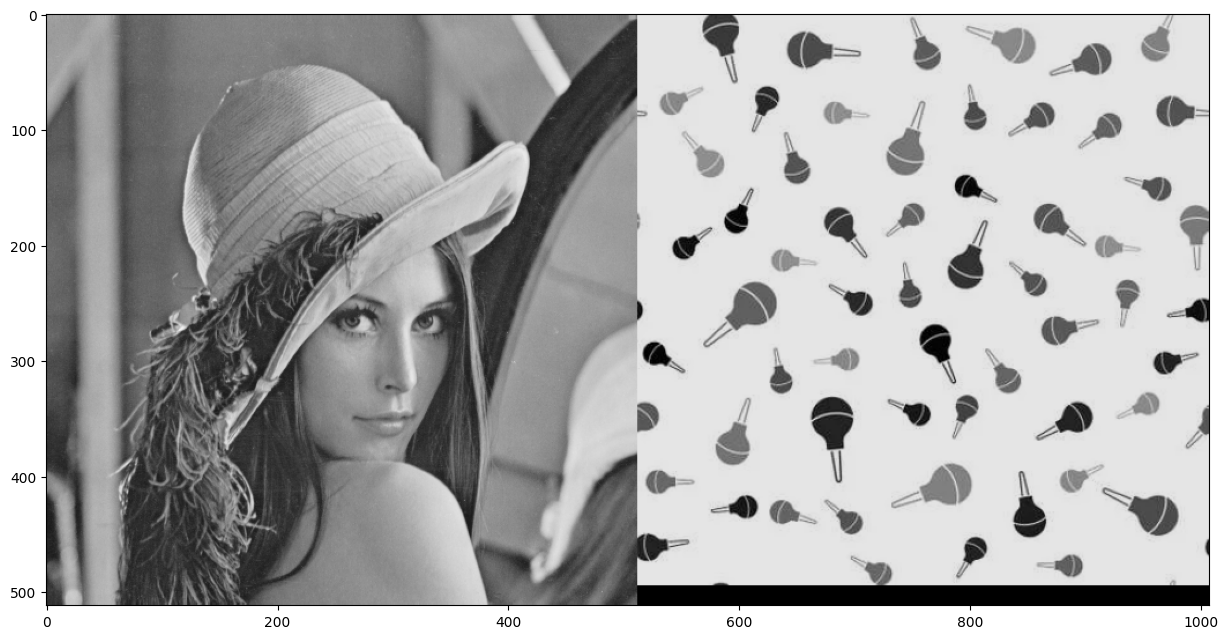

In [92]:
bf = cv2.BFMatcher(cv2.NORM_L1)
matches = bf.knnMatch(des_1, des_2, k=2)

# Лучшие пары особых точек отбираются с использованием теста отношения правдоподобия
good = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        good.append([m])

# построим совпадения на изображении
image_with_knn_matches = cv2.drawMatchesKnn(gray_img,k_1,template_scale,k_2,good[:200],None,flags=2)
plt.figure()
plt.imshow(cv2.cvtColor(image_with_knn_matches, cv2.COLOR_BGR2RGB))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


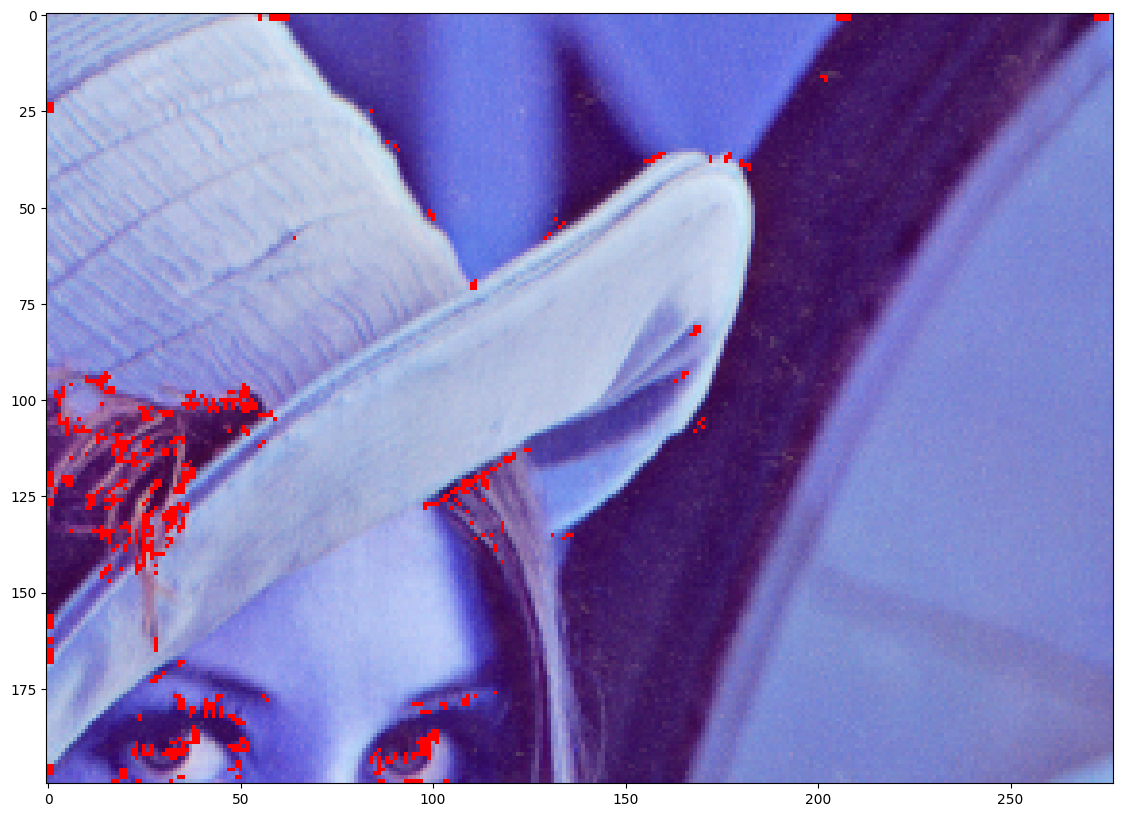

In [98]:
from google.colab import drive
drive.mount('/content/drive')

rgb_image = cv.imread('/content/drive/MyDrive/obrabotka image/images/lenna.png')
ROI = (235, 75, 290, 200)  #(x0, y0, height, width)

cropped_image = rgb_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

gray_image = np.float32(gray_image)
dst = cv2.cornerHarris(gray_image, 2, 3, 0.04)
# Threshold for an optimal value, it may vary depending on the image.
cropped_image[dst > 0.01 * dst.max()] = [255, 0, 0]
plt.imshow(cropped_image)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


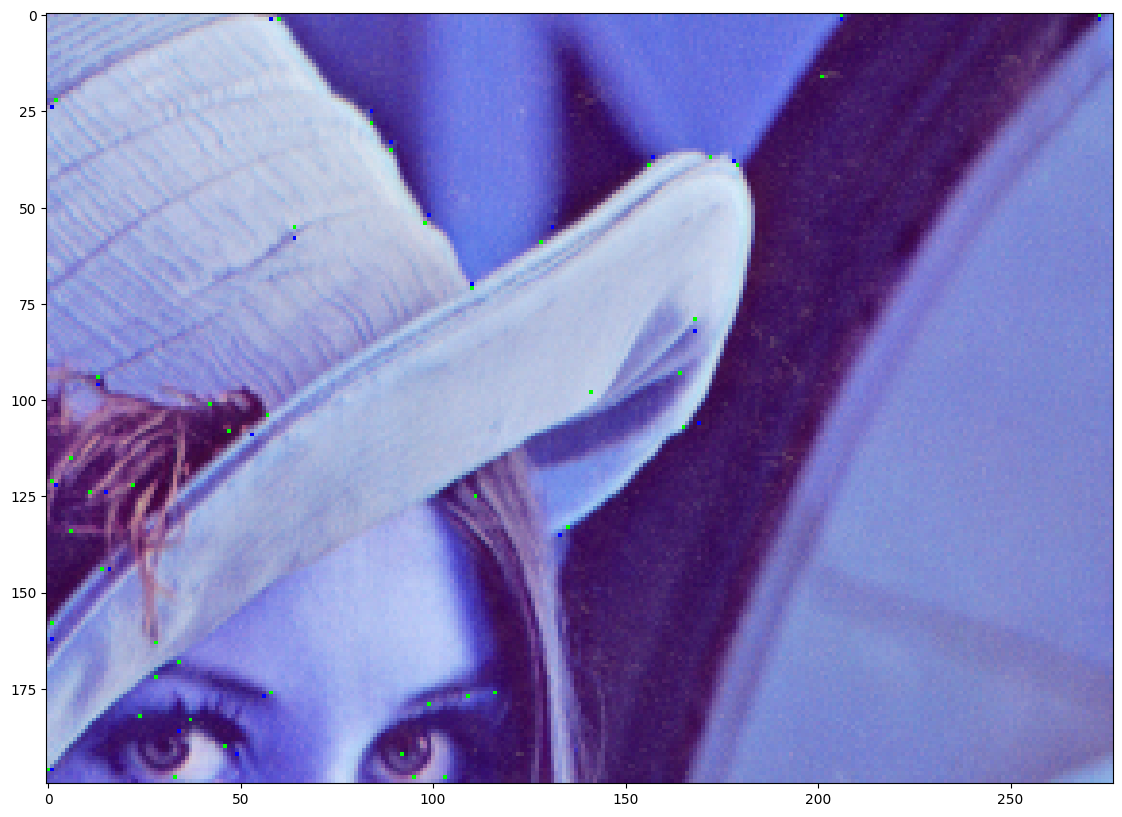

In [99]:
from google.colab import drive
drive.mount('/content/drive')

rgb_image = cv.imread('/content/drive/MyDrive/obrabotka image/images/lenna.png')
ROI = (235, 75, 290, 200)  #(x0, y0, height, width)
image = rgb_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find Harris corners
gray_image = np.float32(gray_image)
dst = cv2.cornerHarris(gray_image, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray_image, np.float32(centroids), (5, 5), (-1, -1), criteria)
# Now draw them
res = np.hstack((centroids, corners))
res = np.int0(res)
image[res[:, 1], res[:, 0]] = [0, 0, 255]
image[res[:, 3], res[:, 2]] = [0, 255, 0]
plt.imshow(image)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


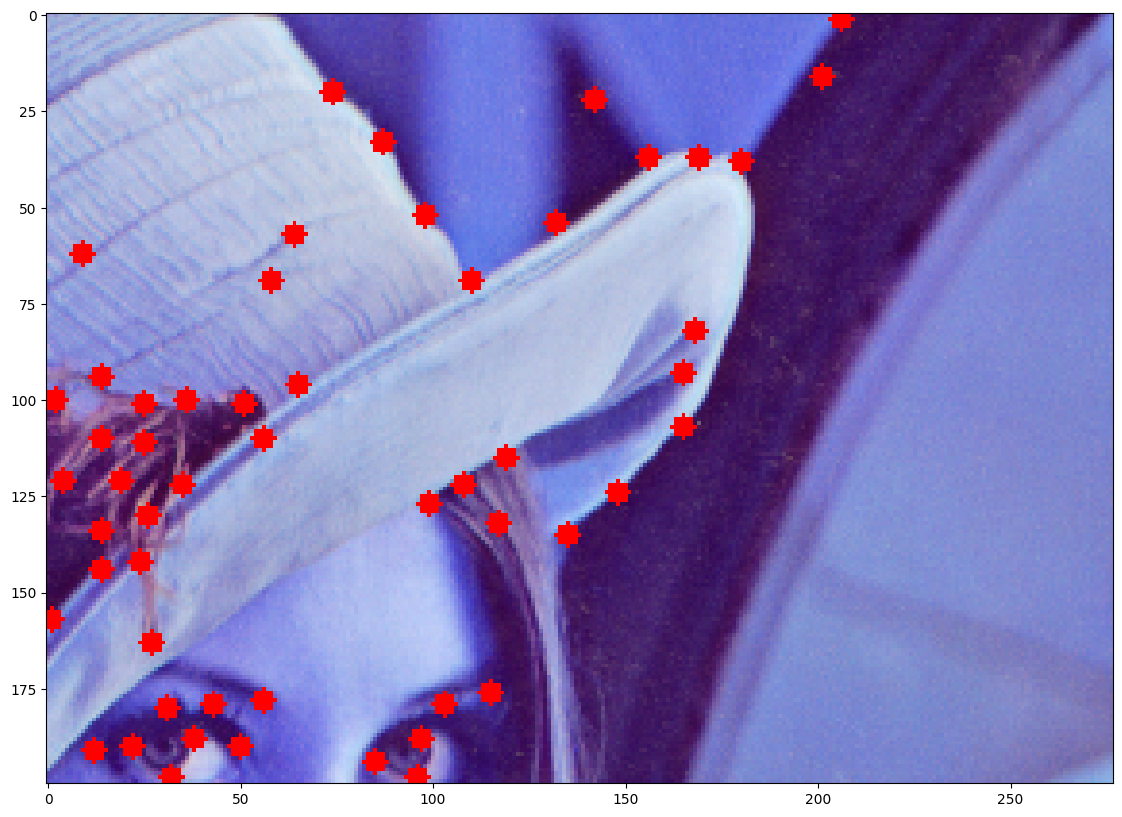

(<matplotlib.image.AxesImage at 0x7c06e62d0670>, None)

In [100]:
from google.colab import drive
drive.mount('/content/drive')

rgb_image = cv.imread('/content/drive/MyDrive/obrabotka image/images/lenna.png')
ROI = (235, 75, 290, 200)  #(x0, y0, height, width)
image = rgb_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_image, 54, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(image, (x, y), 3, 255, -1)

plt.imshow(image), plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


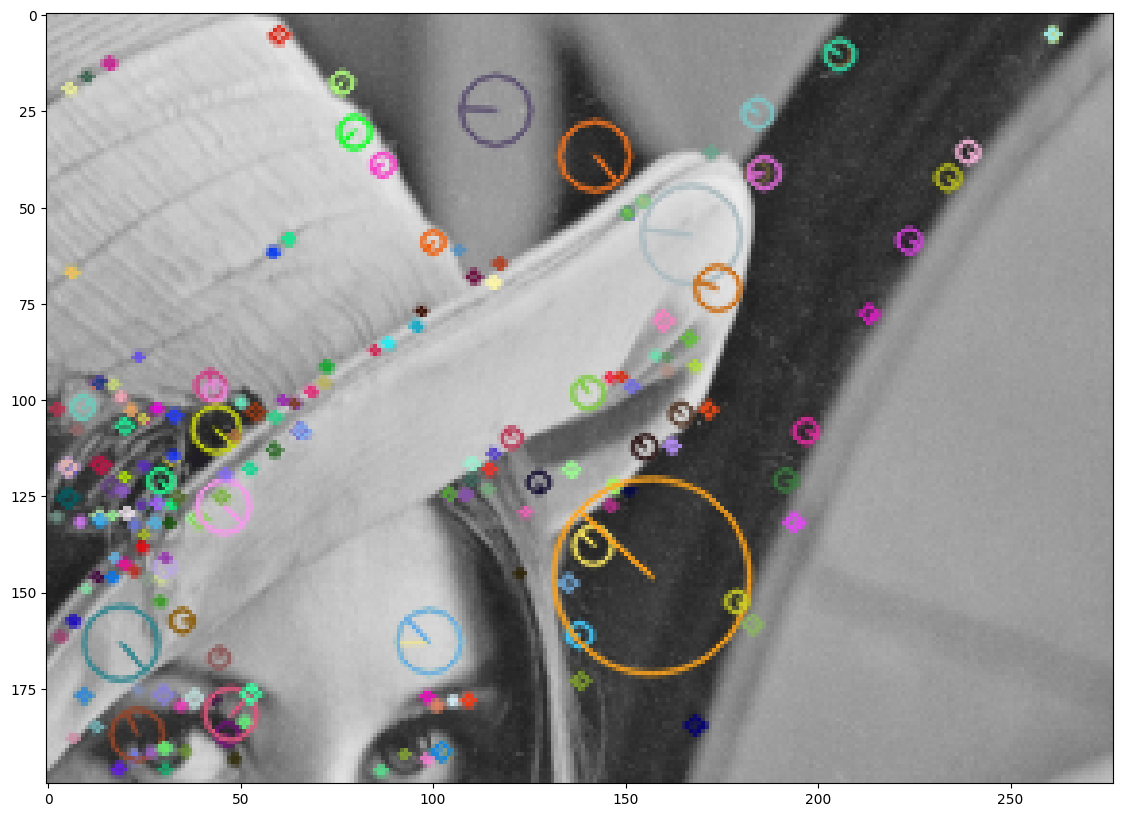

In [101]:
from google.colab import drive
drive.mount('/content/drive')

rgb_image = cv.imread('/content/drive/MyDrive/obrabotka image/images/lenna.png')
ROI = (235, 75, 290, 200)  #(x0, y0, height, width)
image = rgb_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray_image, None)
image = cv2.drawKeypoints(gray_image, kp, image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(image)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 667


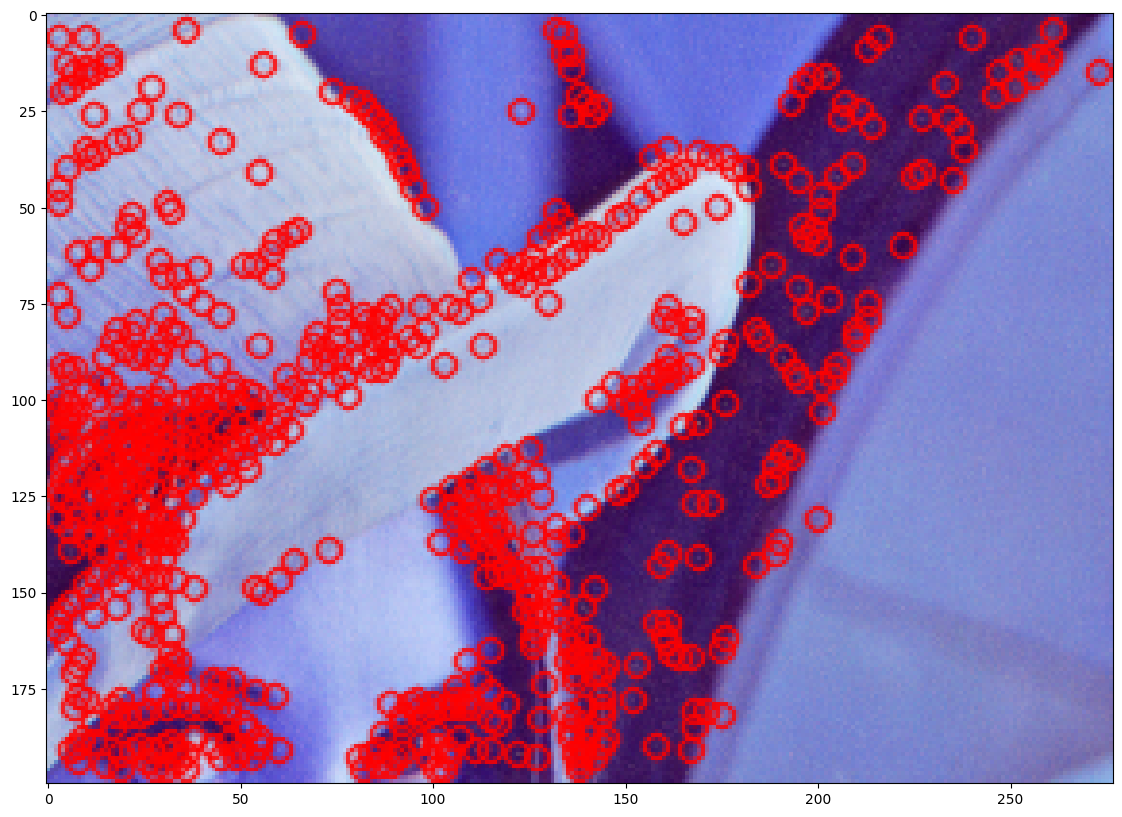

In [102]:
from google.colab import drive
drive.mount('/content/drive')

rgb_image = cv.imread('/content/drive/MyDrive/obrabotka image/images/lenna.png')
ROI = (235, 75, 290, 200)  #(x0, y0, height, width)
img = rgb_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv2.imwrite('fast_true.png', img2)
plt.imshow(img2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


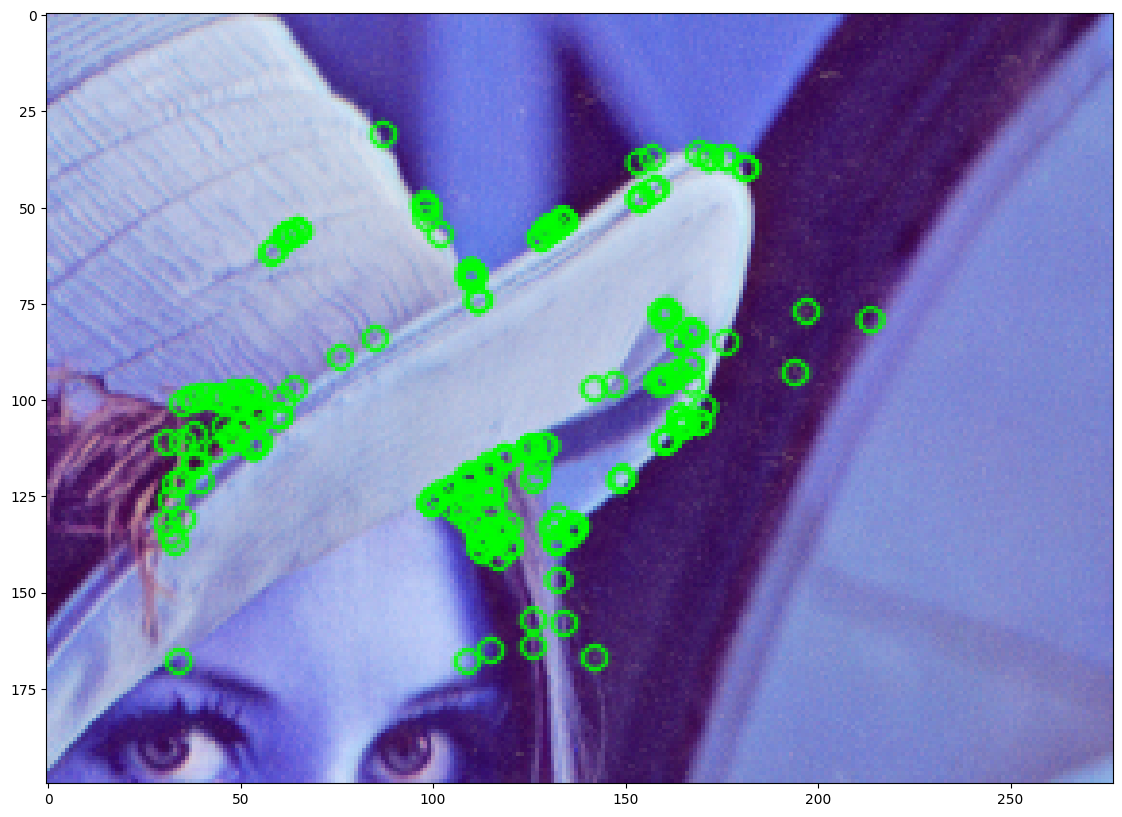

(<matplotlib.image.AxesImage at 0x7c06e605e530>, None)

In [103]:
from google.colab import drive
drive.mount('/content/drive')

rgb_image = cv.imread('/content/drive/MyDrive/obrabotka image/images/lenna.png')
ROI = (235, 75, 290, 200)  #(x0, y0, height, width)
img = rgb_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()